In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
fabdelja_autism_screening_for_toddlers_path = kagglehub.dataset_download('fabdelja/autism-screening-for-toddlers')

print('Data source import complete.')


100%|██████████| 53.2k/53.2k [00:00<00:00, 22.0MB/s]

Extracting files...
Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**load data**

In [ ]:
from google.colab import files
import pandas as pd

# Upload the dataset
print("Please upload your dataset file:")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the dataset into a DataFrame
df = pd.read_csv(file_name)

Please upload your dataset file:


Saving Toddler Autism dataset July 2018.csv to Toddler Autism dataset July 2018.csv


In [ ]:
df1 = df.copy()

In [ ]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
df.shape

(1054, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [ ]:
df.isna().count()

,0
Case_No,1054
A1,1054
A2,1054
A3,1054
A4,1054
A5,1054
A6,1054
A7,1054
A8,1054
A9,1054


In [ ]:
df = df.rename(columns={"Age_Mons":"Age Months",
                        "Family_mem_with_ASD":"Family Member with ASD",
                        "Class/ASD Traits ": "ASD Traits"})
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [ ]:
df["Ethnicity"] = df["Ethnicity"].replace("mixed", "Others")
df["Ethnicity"] = df["Ethnicity"].replace("Native Indian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("asian", "Other Asians")
df["Ethnicity"] = df["Ethnicity"].replace("middle eastern", "Middle Eastern")
df["Ethnicity"] = df["Ethnicity"].replace("south asian", "South Asian")
df["Ethnicity"] = df["Ethnicity"].replace("black", "African")

In [ ]:
df["Ethnicity"].value_counts()

,count
Ethnicity,
White European,334
Other Asians,299
Middle Eastern,188
South Asian,63
African,53
Others,43
Hispanic,40
Latino,26
Pacifica,8


In [ ]:
df["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [ ]:
df["Who completed the test"] = df["Who completed the test"].replace("family member", "Family Member")
df["Who completed the test"] = df["Who completed the test"].replace("Health care professional", "Health Care Professional")

In [ ]:
df["Who completed the test"].value_counts()

,count
Who completed the test,
Family Member,1018
Health Care Professional,29
Self,4
Others,3


In [ ]:
cat_df = df[["Sex", "Ethnicity", "Jaundice", "Who completed the test", "Family Member with ASD", "ASD Traits"]]
num_df = df[["A1", "A2", "A3", "A4","A5","A6", "A7", "A8", "A9", "A10", "Qchat-10-Score", "Age Months"]]

In [ ]:
df.iloc[:, 13:].head(1)

,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits
0,f,Middle Eastern,yes,no,Family Member,No


In [ ]:
for col in df.iloc[:, 13: ]:
    print(col,"\n", df[col].unique(), "\n")

Sex 
 ['f' 'm'] 

Ethnicity 
 ['Middle Eastern' 'White European' 'Hispanic' 'African' 'Other Asians'
 'South Asian' 'Others' 'Latino' 'Pacifica'] 

Jaundice 
 ['yes' 'no'] 

Family Member with ASD 
 ['no' 'yes'] 

Who completed the test 
 ['Family Member' 'Health Care Professional' 'Self' 'Others'] 

ASD Traits 
 ['No' 'Yes'] 



In [ ]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


# DATA VISUALIZATION


In [ ]:
df.iloc[:, 1:11].head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,0,1,1,0,1


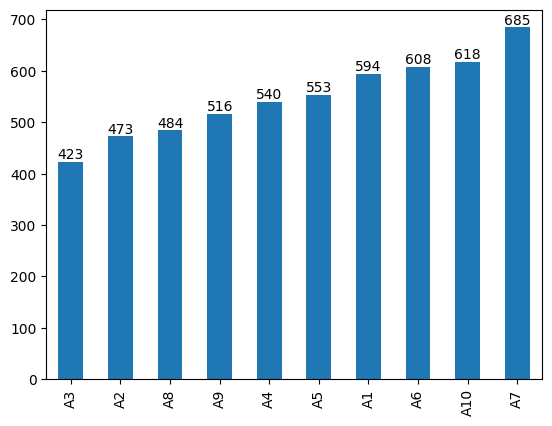

In [ ]:
ax = df.iloc[:, 1:11].sum().sort_values().plot(kind="bar")
ax.bar_label(ax.containers[0]);

In [ ]:
df.isnull().mean() * 100

,0
Case_No,0.0
A1,0.0
A2,0.0
A3,0.0
A4,0.0
A5,0.0
A6,0.0
A7,0.0
A8,0.0
A9,0.0


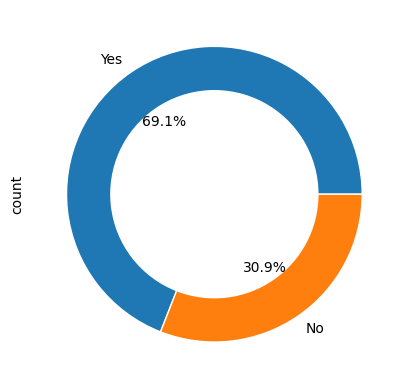

In [ ]:
df["ASD Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'));

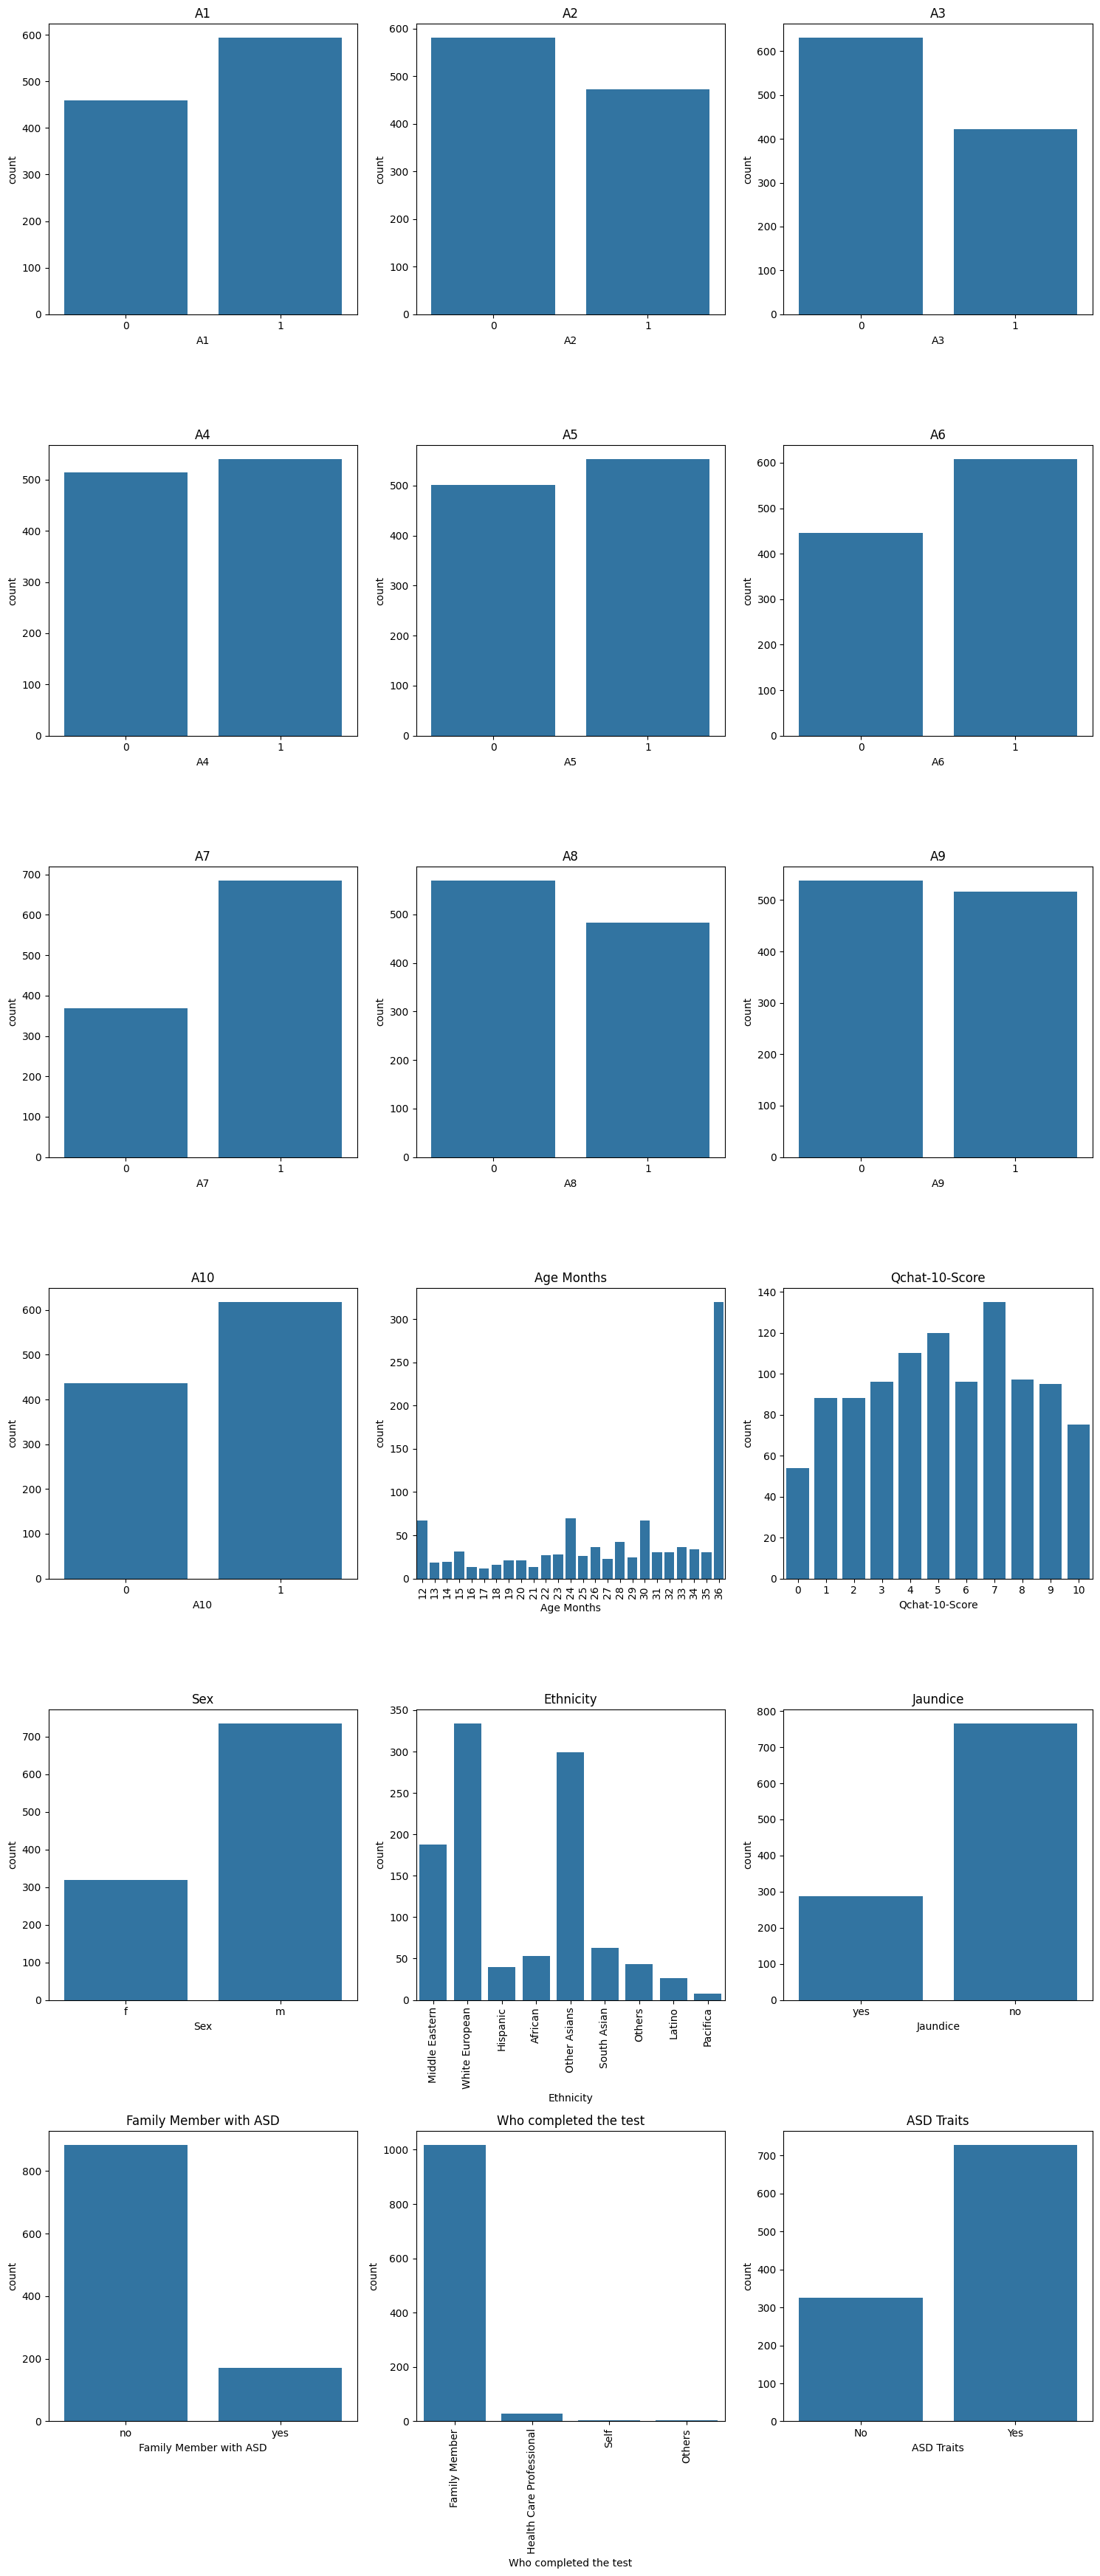

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))

axes = axes.ravel()
for i, col in enumerate(df.iloc[:,1:]):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df.iloc[:, 11:13].head(1)

,Age Months,Qchat-10-Score
0,28,3


<ipython-input-26-e4a3d1a521f8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], ax=axes[i])
<ipython-input-26-e4a3d1a521f8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], ax=axes[i])


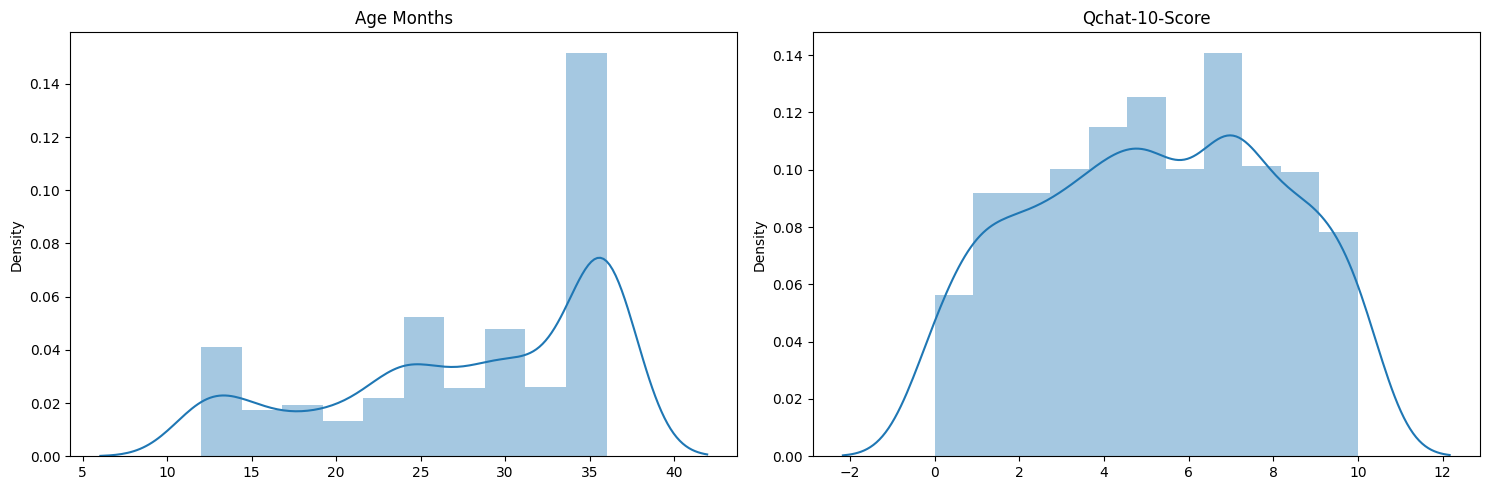

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()
for i, col in enumerate(df.iloc[:, 11:13]):
    sns.distplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

# DATA PREPROCESSING

In [ ]:
df1.drop(columns=["Case_No"], inplace=True)

In [ ]:
mini = df1["Age_Mons"].min()
maxi = df1["Age_Mons"].max()
print(f"Minimum age {mini} and Maximum age {maxi}")

Minimum age 12 and Maximum age 36


In [ ]:
df1["Age"] = df1["Age_Mons"] / 12
df1.drop(columns=["Age_Mons"], inplace=True)

In [ ]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Age
0,0,0,0,0,0,0,1,1,0,1,3,f,middle eastern,yes,no,family member,No,2.333333
1,1,1,0,0,0,1,1,0,0,0,4,m,White European,yes,no,family member,Yes,3.000000
2,1,0,0,0,0,0,1,1,0,1,4,m,middle eastern,yes,no,family member,Yes,3.000000
3,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,no,no,family member,Yes,2.000000
4,1,1,0,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes,1.666667


In [ ]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',  'Age',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ']
df1 = df1[order]

In [ ]:
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2.333333,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3.000000,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3.000000,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2.000000,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1.666667,9,f,White European,no,yes,family member,Yes


# ONEHOT ENCODING

In [ ]:
le = LabelEncoder()
df1["Sex"] = le.fit_transform(df1["Sex"])
df1["Jaundice"] = le.fit_transform(df1["Jaundice"])
df1["Family_mem_with_ASD"] = le.fit_transform(df1["Family_mem_with_ASD"])
df1["Class/ASD Traits "] = le.fit_transform(df1["Class/ASD Traits "])
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,2.333333,3,0,middle eastern,1,0,family member,0
1,1,1,0,0,0,1,1,0,0,0,3.000000,4,1,White European,1,0,family member,1
2,1,0,0,0,0,0,1,1,0,1,3.000000,4,1,middle eastern,1,0,family member,1
3,1,1,1,1,1,1,1,1,1,1,2.000000,10,1,Hispanic,0,0,family member,1
4,1,1,0,1,1,1,1,1,1,1,1.666667,9,0,White European,0,1,family member,1


# ONEHOT ENCODING

In [ ]:
df1 = pd.get_dummies(df1, columns=["Ethnicity", "Who completed the test"], drop_first=True)
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member
0,0,0,0,0,0,0,1,1,0,1,...,False,False,False,True,False,False,False,False,False,True
1,1,1,0,0,0,1,1,0,0,0,...,True,False,False,False,False,False,False,False,False,True
2,1,0,0,0,0,0,1,1,0,1,...,False,False,False,True,False,False,False,False,False,True
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,True
4,1,1,0,1,1,1,1,1,1,1,...,True,False,False,False,False,False,False,False,False,True


In [ ]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Qchat-10-Score', 'Sex', 'Jaundice', 'Family_mem_with_ASD', 'Ethnicity_Latino',
        'Ethnicity_Native Indian','Ethnicity_Others', 'Ethnicity_Pacifica',
        'Ethnicity_White European','Ethnicity_asian', 'Ethnicity_black', 'Ethnicity_middle eastern',
       'Ethnicity_mixed', 'Ethnicity_south asian',
       'Who completed the test_Health care professional',
       'Who completed the test_Others', 'Who completed the test_Self',
       'Who completed the test_family member', 'Class/ASD Traits ']

df1 = df1[order]
df1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Who completed the test_Health care professional,Who completed the test_Others,Who completed the test_Self,Who completed the test_family member,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,False,False,False,True,0
1,1,1,0,0,0,1,1,0,0,0,...,False,False,False,False,False,False,False,False,True,1
2,1,0,0,0,0,0,1,1,0,1,...,False,False,True,False,False,False,False,False,True,1
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,True,1
4,1,1,0,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,True,1


# DATA SPLITTING

In [ ]:
X = df1.drop(columns=["Class/ASD Traits "])
y = df1["Class/ASD Traits "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FEATURE SCALING

In [ ]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# MODEL BUILDING

In [ ]:
def train_model(model, X_train_scaled, y_train, X_test_scaled, y_test):

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])
    return score_df

# Logistic Regression

In [ ]:
model = LogisticRegression()

results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

results.index = ["Logistic Regression"]
results

,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0


# Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
decision_tree_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

decision_tree_results.index = ["Decision Tree Classifier"]

decision_tree_results

,accuracy,precision,recall,f1
Decision Tree Classifier,1.0,1.0,1.0,1.0


# Ensemble Techniques

In [ ]:
model = RandomForestClassifier()
random_forest_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

random_forest_results.index = ["Random Forest Classifier"]
random_forest_results

,accuracy,precision,recall,f1
Random Forest Classifier,1.0,1.0,1.0,1.0


In [ ]:
model = AdaBoostClassifier()
ada_boost_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

ada_boost_results.index = ["Ada Boost Classifier"]
ada_boost_results

,accuracy,precision,recall,f1
Ada Boost Classifier,1.0,1.0,1.0,1.0


In [ ]:
model = SVC()
svm_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

svm_results.index = ["SVM Classifier"]
svm_results

,accuracy,precision,recall,f1
SVM Classifier,0.985782,0.992908,0.985915,0.989399


# KNeighbors

In [ ]:
model = KNeighborsClassifier()
knn_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

knn_results.index = ["KNeighbors Classifier"]
knn_results

,accuracy,precision,recall,f1
KNeighbors Classifier,0.971564,1.0,0.957746,0.978417


# Artificial Neural Network

In [ ]:
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=29))

#model.add(Dense(64, activation="relu"))

#model.add(Dense(32, activation="relu"))

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=None
)
history = model.fit(X_train_scaled, y_train, batch_size=10, epochs=300, validation_split=0.2, callbacks=callback)

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7521 - loss: 0.5109 - val_accuracy: 0.8817 - val_loss: 0.3164
Epoch 2/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9189 - loss: 0.2656 - val_accuracy: 0.9527 - val_loss: 0.1966
Epoch 3/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.1613 - val_accuracy: 0.9645 - val_loss: 0.1426
Epoch 4/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9659 - loss: 0.1308 - val_accuracy: 0.9645 - val_loss: 0.1110
Epoch 5/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.1109 - val_accuracy: 0.9822 - val_loss: 0.0922
Epoch 6/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9756 - loss: 0.0807 - val_accuracy: 0.9822 - val_loss: 0.0786
Epoch 7/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9873 - loss: 0.0640 - val_accuracy: 0.9882 - val_loss: 0.0706
Epoch 8/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9884 - loss: 0.0647 - val_accuracy: 0.9882 - val_loss: 0.0

In [ ]:
y_prob = model.predict(X_test_scaled)
y_pred = np.where(y_prob > 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

nn_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                     columns=['accuracy', 'precision', 'recall', 'f1'])
nn_df.index = ["Artificial Neural Network"]
nn_df

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


,accuracy,precision,recall,f1
Artificial Neural Network,0.990521,0.992958,0.992958,0.992958
